In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

time_folder = "24-08-18-mlp_v3-minmax"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'scale_y',
       'skip_mode', 'conv', 'mlp', 'use_pos', 'seq_len', 'lr', 'd', 'hid_d',
       'last_d', 'tok_d', 'time_d', 'pos_d', 'e_layers', 'tok_conv_k',
       'conv_out_d', 'feat_conv_k', 'dropout', 'norm_type', 'num_heads', 'bs'],
      dtype='object')


In [16]:
import math


def plot_rmse_effects(
    df, x, y=["train_custom_acc", "val_custom_acc", "test_custom_acc"]
):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)

        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows)
        )

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)

        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

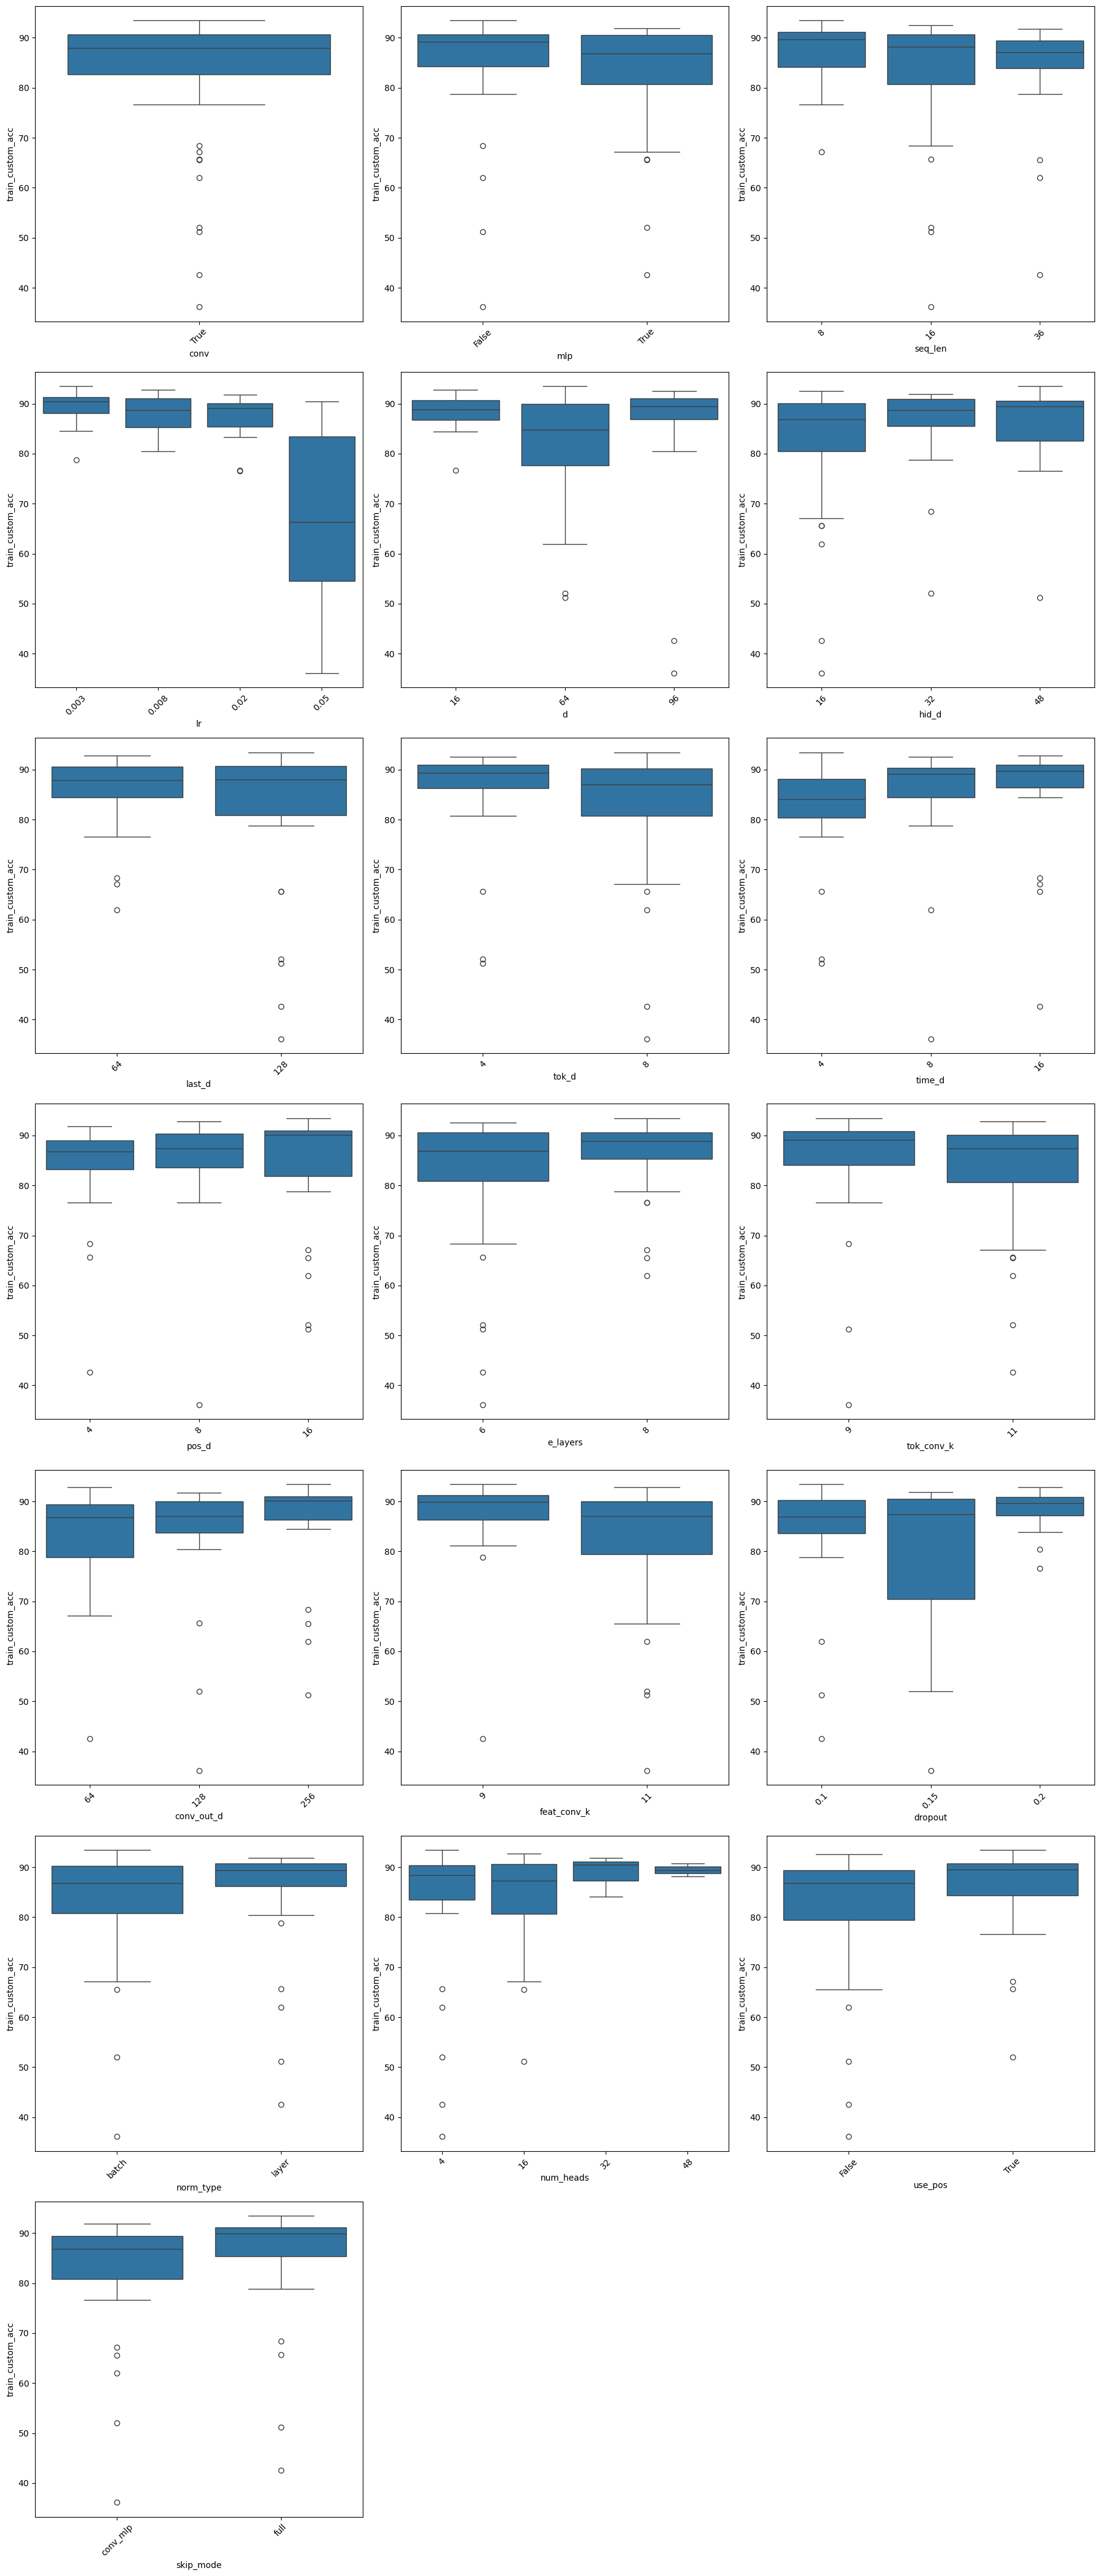

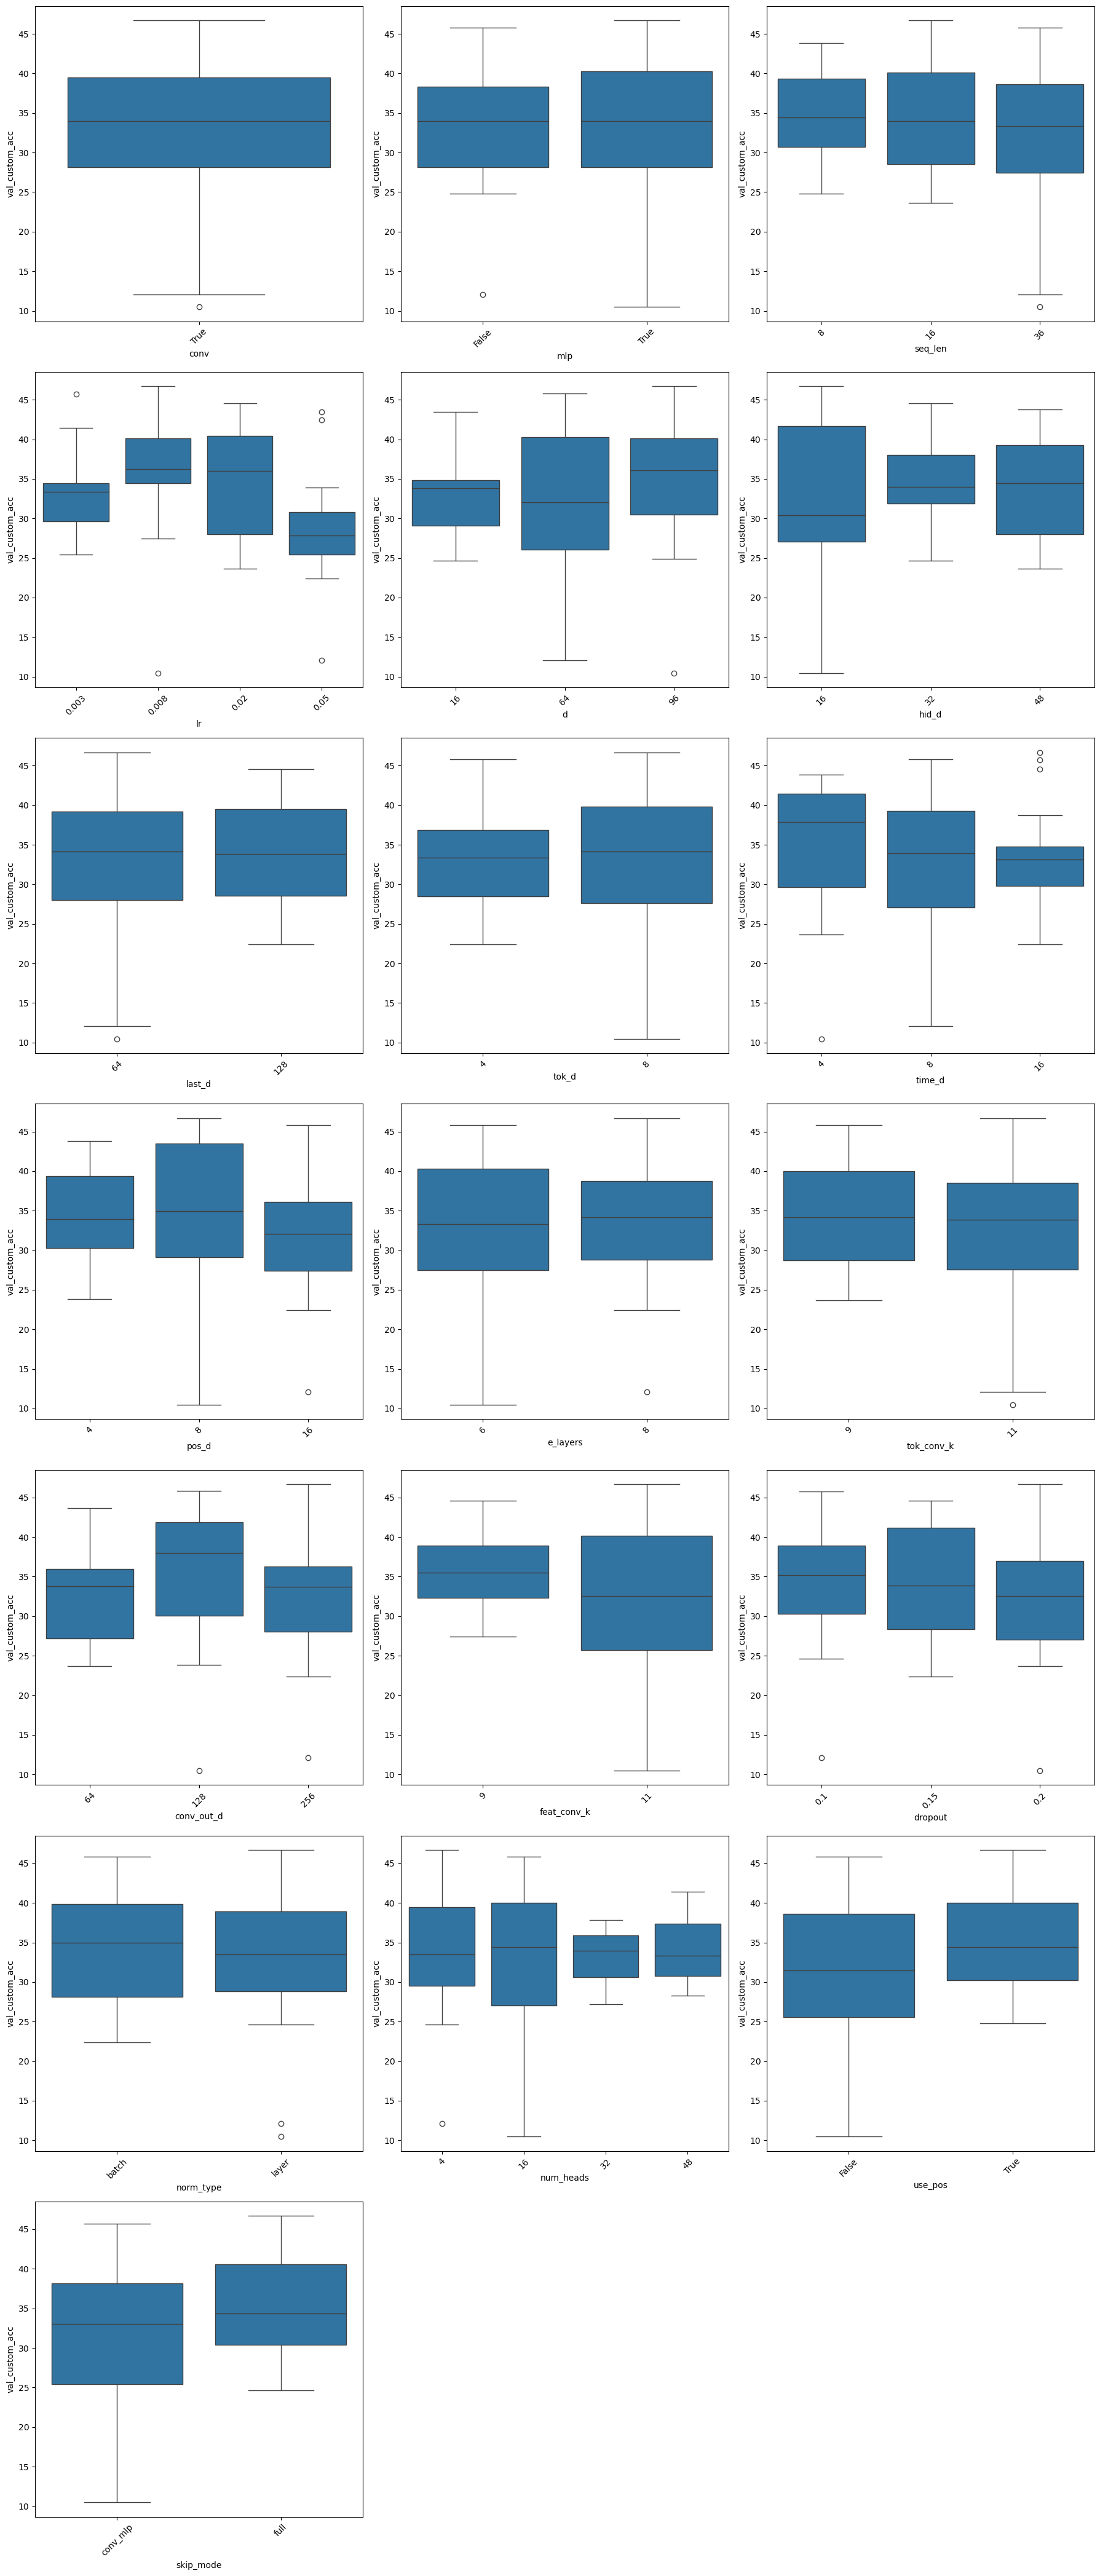

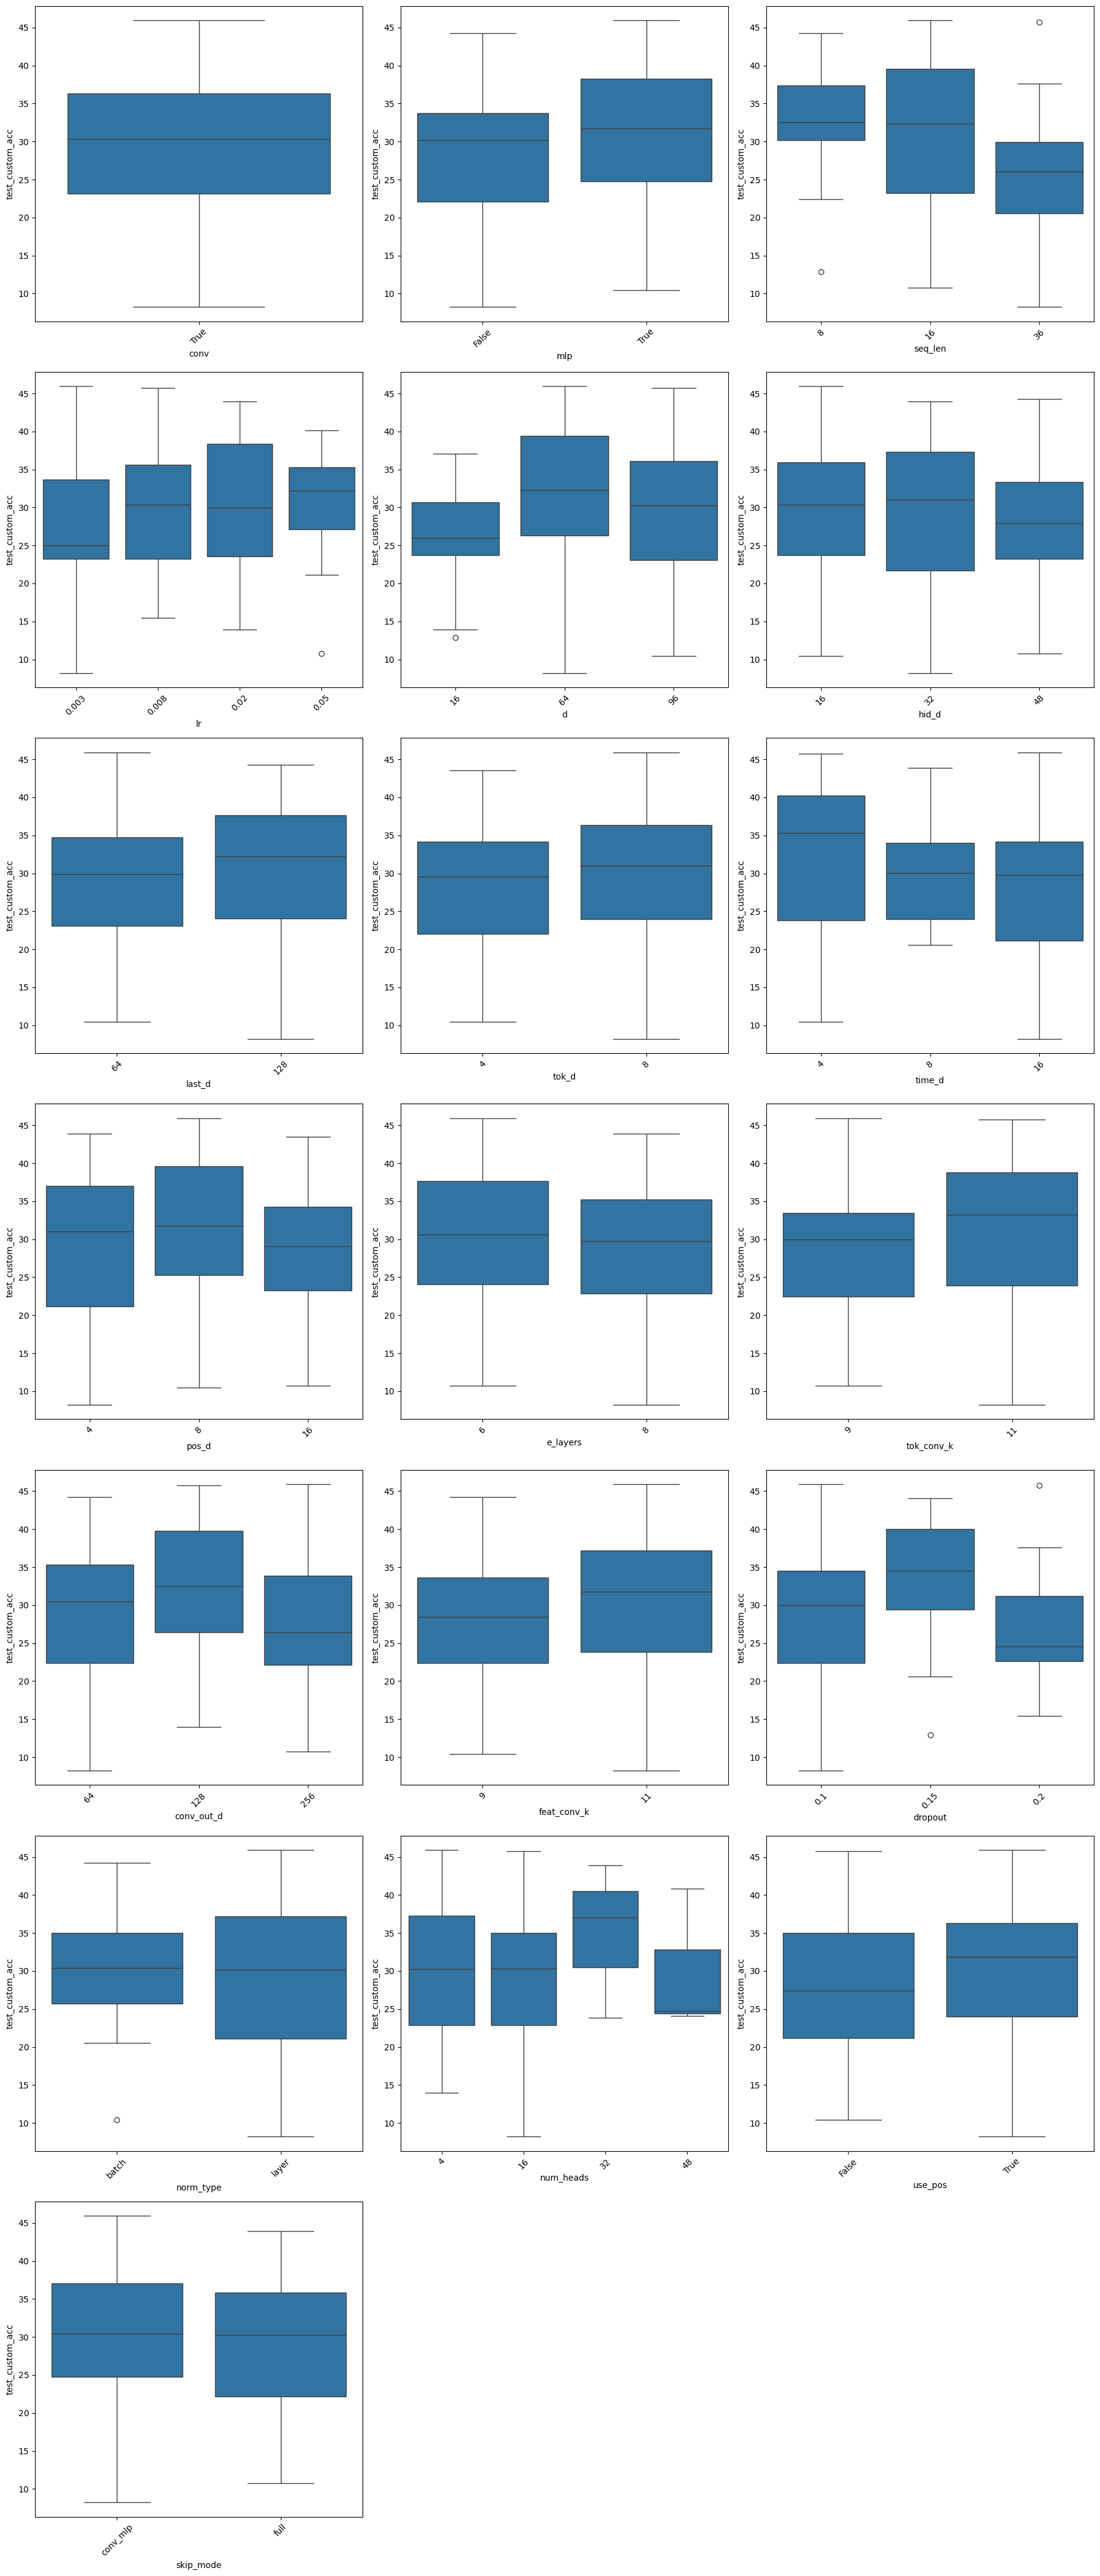

In [17]:
plot_features = [
    "conv",
    "mlp",
    "seq_len",
    "lr",
    "d",  # d_model
    "hid_d",  # hidden_d_model
    "last_d",  # last_d_model
    "tok_d",  # token_d_model
    "time_d",  # time_d_model
    "pos_d",  # pos_d_model
    "e_layers",
    "tok_conv_k",  # token_conv_kernel
    "conv_out_d",  # conv_out_dim
    "feat_conv_k",  # feat_conv_kernel
    "dropout",
    "norm_type",
    "num_heads",
    "use_pos",
    "skip_mode",
]

# Plotting the effects
plot_rmse_effects(df, x=plot_features)

In [18]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0 * df["train_rmse"] + 0.4 * df["val_rmse"] + 0.4 * df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [19]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'scale_y',
       'skip_mode', 'conv', 'mlp', 'use_pos', 'seq_len', 'lr', 'd', 'hid_d',
       'last_d', 'tok_d', 'time_d', 'pos_d', 'e_layers', 'tok_conv_k',
       'conv_out_d', 'feat_conv_k', 'dropout', 'norm_type', 'num_heads', 'bs',
       'sum_rmse'],
      dtype='object')

In [20]:
selected_cols = [
    "train_rmse",
    "train_custom_acc",
    "val_rmse",
    "val_custom_acc",
    "test_rmse_for_best_val",
    "test_rmse",
    "test_custom_acc",
    "val_custom_acc_for_best_test",
]
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
11,11941.3320,87.037216,72042.766,43.465317,78005.950,63604.990,30.436474,9.447777
34,11629.6120,86.989380,69062.940,34.561741,85163.720,69435.600,34.126057,10.006380
0,11866.5640,87.044502,67276.880,40.347637,79041.390,71767.375,20.567400,38.914715
51,19984.9730,76.607872,65938.480,35.980892,94648.516,73219.180,35.304325,38.151146
62,7509.7440,91.840569,72421.450,33.956314,74460.720,67393.070,43.909557,-18.598484
56,17182.5350,83.912849,70188.710,23.819273,67985.510,69664.010,29.859686,22.574091
3,9723.9190,88.963470,69464.800,28.536533,86549.060,70392.520,21.147501,-19.916142
16,20889.6840,78.794418,69737.930,33.759426,70198.030,70198.030,35.642517,33.759426
18,8467.4650,90.641251,71931.470,27.793741,68860.700,68350.445,26.207001,35.085957
50,7051.8545,92.547188,69230.984,36.440422,80299.586,71395.100,30.248474,40.701038


In [21]:
# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)


In [22]:
# print last few columns
print(output.iloc[:, -16:])

       lr   d  hid_d  last_d  tok_d  time_d  pos_d  e_layers  tok_conv_k  \
11  0.050  16     16      64      8       8      8         8           9   
34  0.008  96     32      64      8      16      8         6           9   
0   0.008  96     32      64      8       8      4         6          11   
51  0.020  16     48      64      8       4      4         8           9   
62  0.020  64     32     128      8       8      4         8          11   
56  0.020  64     16      64      8       8      4         6           9   
3   0.050  64     16      64      4      16      4         8           9   
16  0.003  64     32     128      8       8     16         8          11   
18  0.020  64     48      64      8      16     16         8          11   
50  0.008  96     16     128      4       8     16         6          11   

    conv_out_d  feat_conv_k  dropout norm_type  num_heads    bs    sum_rmse  
11         128           11     0.20     layer         16  1024  54259.1024  
34     